<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="homework.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Take-Home <br>(Session 5)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**Import the required libraries**

In [1]:
# import 'pandas' 
import pandas as pd 

# import 'numpy' 
import numpy as np

# import subpackage of matplotlib
import matplotlib.pyplot as plt

# import 'seaborn'
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# import statsmodels
import statsmodels.api as sm

# import 'stats' package from scipy library
from scipy import stats

# import statistics to perform statistical computations
import statistics

# to test the normality 
from scipy.stats import shapiro

# import a library to perform Z-test
from statsmodels.stats import weightstats as stests

In [2]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

### Let's begin with some hands-on practice exercises

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. The economic journal claims that the students who graduated from tier 1 universities get more salary than the average salary of 35000$. A random sample of 20 graduated students is selected to test the claim. Use p-value criteria to test the claim with 0.1 as a level of significance.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Use the data given below:

        salary = [29560, 26534, 31020, 44300, 52335, 69190, 71100, 80100, 90000, 41002, 46118, 88129, 79713, 95881, 47989,
                  15188, 91631, 96189, 77819, 79590]

As the sample size is less (< 30) and the population standard deviation is unknown; we use the one sample t-test for population mean.

In [3]:
# consider a list of salary
salary = [29560, 26534, 31020, 44300, 52335, 69190, 71100, 80100, 90000, 41002, 46118, 88129, 79713, 95881, 47989, 15188,
          91631, 96189, 77819, 79590]

# calculate sample mean
sample_avg = np.mean(salary)

# calculate sample standard deviation
sample_std = statistics.stdev(salary)

# sample size
n = len(salary)

# degrees of freedom for 1 sample t-test
print('Degrees of freedom:', n - 1)

Degrees of freedom: 19


Let us check the normality of the data.

In [4]:
# perform Shapiro-Wilk test to test the normality
# shapiro() returns a tuple having the values of test statistics and the corresponding p-value
# pass the salaries to perform the test
stat, p_value = shapiro(salary)

# print the test statistic and corresponding p-value 
print('Test statistic:', stat)
print('P-Value:', p_value)

Test statistic: 0.9203506112098694
P-Value: 0.1006370484828949


From the above result, we can see that the p-value is greater than 0.05, thus we can say that the data is normally distributed.

The null and alternative hypothesis is:

H<sub>0</sub>: $\mu \leq 35000$<br>
H<sub>1</sub>: $\mu > 35000$

In [5]:
# use 'ttest_1samp()' to calculate the test statistic and corresponding p-value for 2-tailed test
# pass the sample data to the parameter, 'a'
# pass the average value in the null hypothesis to the parameter, 'popmean'
t_stat, p_val = stats.ttest_1samp(a = salary, popmean = 35000)

In our example, the hypothesis test is one-tailed. Thus, we divide the two-tailed probability by 2 to obtain the one-tailed probability.

In [6]:
# divide the p-value by 2
req_p_val = p_val/2

# print the test statistic value and corresponding p-value
print('Test Statistic:', t_stat)
print('p-value:', req_p_val)

Test Statistic: 4.777624690114069
p-value: 6.544700826360017e-05


We can see that the p-value is less than 0.1. Thus, we reject the null hypothesis and there is enough evidence to conclude that the students who graduated from tier 1 universities get more salary than 35000$.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Amy and Susan are national level swimmers. Their coach conducts five rounds each of 400 m and records the time taken by the individuals. Perform a two sample t-test by plotting the acceptance and rejection regions to test whether there is any difference between the average time taken by Amy and Susan. Use 0.05 as a level of significance.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Use the timing (in minutes) given below:

        Amy_time = [4.2, 3, 3.8, 5, 4.6]
        Susan_time = [5.2, 4.6, 3.9, 4.4, 5]

In [7]:
# given data
Amy_time = [4.2, 3, 3.8, 5, 4.6]
Susan_time = [5.2, 4.6, 3.9, 4.4, 5]

# time taken by both the swimmers
time = [4.2, 3, 3.8, 5, 4.6, 5.2, 4.6, 3.9, 4.4, 5]

Let us check the normality of the time taken by Amy and Susan.

In [8]:
# perform Shapiro-Wilk test to test the normality
# shapiro() returns a tuple having the values of test statistics and the corresponding p-value
stat, p_value = shapiro(time)

# print the test statistic and corresponding p-value 
print('Test statistic:', stat)
print('P-Value:', p_value)

Test statistic: 0.9408392906188965
P-Value: 0.5623903870582581


From the above result, we can see that the p-value is greater than 0.05, thus we can say that the time taken by both the swimmers is normally distributed.

Let us check the equality of variances.

In [9]:
# perform Levene's test
# levene() returns a tuple having the values of test statistics and the corresponding p-value
stat, p_value = stats.levene(Amy_time, Susan_time)

# print the test statistic and corresponding p-value 
print('Test statistic:', stat)
print('P-Value:', p_value)

Test statistic: 0.5586206896551716
P-Value: 0.47620846378024845


From the above result, we can see that the p-value is greater than 0.05, thus we can say that the population variances are equal.

The null and alternative hypothesis is:

H<sub>0</sub>: There is no difference between the average time taken by Amy and Susan ($\mu_{1} - \mu_{2} = 0$)<br>
H<sub>1</sub>: There is difference between the average time taken by Amy and Susan ($\mu_{1} - \mu_{2} \neq 0$)

In [10]:
# size of first sample
n_1 = len(Amy_time)

# size of second sample
n_2 = len(Susan_time)

# degrees of freedom for 2 sample t-test
print('Degrees of freedom:', n_1 + n_2 - 2)

Degrees of freedom: 8


In [11]:
# use 'ttest_ind()' to calculate the test statistic and corresponding p-value for 2 sample test
# pass the sample data to the parameter, 'a' and 'b'
t_stat, p_val = stats.ttest_ind(a = Amy_time, b = Susan_time)

Let us plot the acceptance and rejection region for a two-tailed test with 95% confidence.

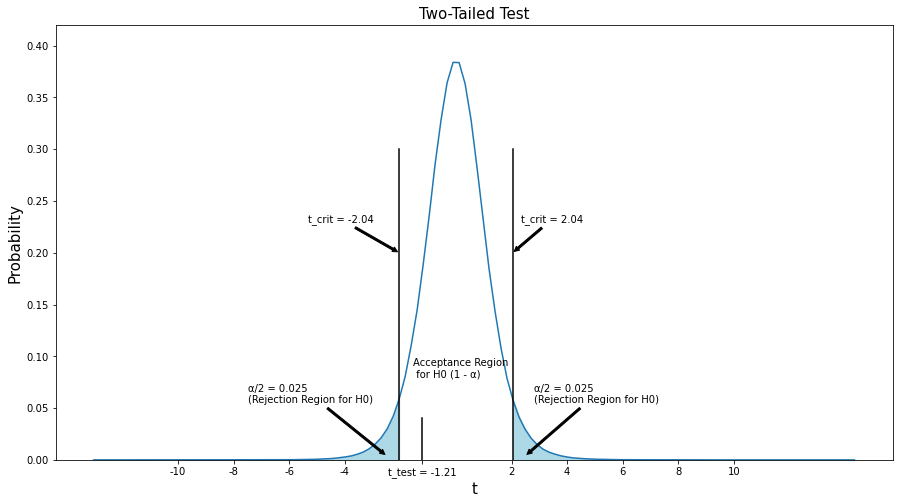

In [12]:
# consider a random variable 'X' that follows a t-distribution with 31 degrees of freedom
# pass the degrees of freedom to the parameter, 'df'
# pass the required number of observations to the parameter, 'size'
# set 'random_state' to obtain the same observations every time you run the code 
X = stats.t.rvs(df = 8, size = 2000000, random_state = 15)

# plot the distribution of X
# pass the data to the parameter, 'a'
# 'hist=False' does not return the histogram 
# 'cumulative=False' in 'kde_kws' does not return the cumulative kernel density estimator
ax = sns.distplot(a = X, hist = False, kde_kws = dict(cumulative=False))

# set the limit for y-axis
plt.ylim(0, 0.42)

# use 'stats.t.isf()' to find the t-value for alpha = 0.05
# pass the value of 'alpha/2' to the parameter 'q' for a two tailed test
# pass the degrees of freedom to the parameter, 'df' 
t = stats.t.isf(q = 0.05/2, df = 31)

# plot a vertical line at t-value
x, y = [t, t], [0, 0.3]
plt.plot(x, y, color = 'black')

# plot a vertical line at -(t-value)
x, y = [-t, -t], [0, 0.3]
plt.plot(x, y, color = 'black')

# plot a vertical line at test statistic value
x, y = [t_stat, t_stat], [0, 0.04]
plt.plot(x, y, color = 'black')

# add the color to the right of the t-value and left of the -(t-value)
# get the data for x and y axes
l1 = ax.lines[0]
x1 = l1.get_xydata()[:,0]
y1 = l1.get_xydata()[:,1]

# fill the color for the region where x-values are greater than the critical t-value
# pass the condition to shade the required region
# pass the required color to the parameter, 'color'
ax.fill_between(x1[x1 >= t], y1[x1 >= t], color = 'lightblue')

# fill the color for the region where x-values are less than -(t-value)
# pass the condition to shade the required region
# pass the required color to the parameter, 'color'
ax.fill_between(x1[x1 <= -t], y1[x1 <= -t], color = 'lightblue')

# use 'annonate' function to draw an arrow between points xy and xytext
# 's' is a argument to write text
# we can change the facecolor and arrowstyle; this is only for representation purpose
plt.annotate(s = 'α/2 = 0.025\n(Rejection Region for H0)', xy = (2.5, 0.004), xytext = (2.8, 0.055), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

plt.annotate(s = 'α/2 = 0.025\n(Rejection Region for H0)', xy = (-2.5, 0.004), xytext = (-7.5, 0.055), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

plt.annotate(s = 't_crit = '+ str(round(t,2)), xy = (t, 0.2), xytext = (t+0.3, 0.23), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

plt.annotate(s = 't_crit = '+ str(round(-t,2)), xy = (-t, 0.2), xytext = (-t-3.3, 0.23), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

# use below code to print the values in the graph
# 'x' and 'y' gives position of the text
# 's' is the text 
plt.text(x = -1.55, y = 0.08, s = 'Acceptance Region \n for H0 (1 - α)')

# assign the x-axis labels
# pass the position of labels to the parameter, 'ticks'
# pass the required labels to the parameter, 'labels'
plt.xticks(ticks = [-10, -8, -6, -4, 2, 4, 6, 8, 10, round(t_stat,2)], 
           labels = [-10, -8, -6, -4, 2, 4, 6, 8, 10, 't_test = '+str(round(t_stat,2))])

# set plot and axes labels
# set text size using 'fontsize'
plt.xlabel('t', fontsize = 15)
plt.ylabel('Probability', fontsize = 15)
plt.title('Two-Tailed Test', fontsize = 15)

# display the plot
plt.show()

The above plot shows that the test statistic value is in the acceptance region, that implies we fail to reject (i.e. accept) $H_{0}$ and conclude that there is no difference between the average time taken by Amy and Susan.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. A multinational company had organized a presentation activity to test the soft skills of their 6 sales executives and then offered them a skill development course. After the completion of the course, the executives again appeared for the presentation and the scores before and after the course are recorded. Test the company's claim that the course was effective in developing soft skills with 90% confidence using the p-value technique.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Consider the scores given in the file `paired_data.xlsx`

In [13]:
# read the excel file
df_score = pd.read_excel('paired_data.xlsx')

# print the first two observations
df_score.head(2)

,before_score,after_score
0,23,32
1,38,36


Let us check the normality of the scores before the skill development course.

In [14]:
# perform Shapiro-Wilk test to test the normality
# shapiro() returns a tuple having the values of test statistics and the corresponding p-value
# pass the  scores before the skill development course to perform the test
stat, p_value = shapiro(df_score['before_score'])

# print the test statistic and corresponding p-value 
print('Test statistic:', stat)
print('P-Value:', p_value)

Test statistic: 0.9983048439025879
P-Value: 0.999838650226593


From the above result, we can see that the p-value is greater than 0.05, thus we can say that the scores before the skill development course are normally distributed.

Let us check the normality of the scores after the skill development course.

In [15]:
# perform Shapiro-Wilk test to test the normality
# shapiro() returns a tuple having the values of test statistics and the corresponding p-value
# pass the scores after the skill development course to perform the test
stat, p_value = shapiro(df_score['after_score'])

# print the test statistic and corresponding p-value 
print('Test statistic:', stat)
print('P-Value:', p_value)

Test statistic: 0.903013288974762
P-Value: 0.39204761385917664


From the above result, we can see that the p-value is greater than 0.05, thus we can say that the scores after the skill development course are normally distributed.

The null and alternative hypothesis is:

H<sub>0</sub>: The skill development course was not effective in developing the soft skills ($\mu_{d} \leq 0$)<br>
H<sub>1</sub>: The skill development course was effective in developing the soft skills ($\mu_{d} > 0$)

In [16]:
# use 'ttest_rel()' to calculate the t-statistic and corresponding p-value for paired samples
# pass the after and before scores to the function
t_stat, p_val = stats.ttest_rel(df_score['after_score'], df_score['before_score'])

# print the p-value 
print("p-value:", p_val)

p-value: 0.03993727174744146


We can see that the p-value is less than 0.1. Thus, we reject the null hypothesis and conclude that the skill development course was effective in developing soft skills of sales executives.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. A survey conducted by the department of education states that the proportion of students who quit education due to financial crisis is more than 38%. To test this claim a group of 450 students is selected out of which 205 are found to be dropped out from school due to financial crisis. Test the claim using a critical value method with 95% confidence. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

The null and alternative hypothesis is:

H<sub>0</sub>: $P \leq 0.38$<br>
H<sub>1</sub>: $P > 0.38$ 

Here ⍺ = 0.05, for a one-tailed test calculate the critical z-value.

In [17]:
# calculate the z-value for 95% of confidence level
# use 'stats.norm.isf()' to find the z-value corresponding to the upper tail probability 'q'
# pass the value of 'alpha' to the parameter 'q', here alpha = 0.05
# use 'round()' to round-off the value to 2 digits
z_val = np.abs(round(stats.norm.isf(q = 0.05), 2))

print('Critical value for one-tailed Z-test:', z_val)

Critical value for one-tailed Z-test: 1.64


i.e. if z is greater than 1.64 then we reject the null hypothesis.

In [18]:
# sample size
n = 450

# number of children who quit the school
x = 205

# sample proportion
p_samp = x / n

# hypothesized proportion
hypo_p = 0.38

# calculate test statistic value for 1 sample proportion test
z_prop = (p_samp - hypo_p) / np.sqrt((hypo_p * (1 - hypo_p)) / n)

print('Test statistic:', z_prop)

Test statistic: 3.3020604315723676


Here the test statistic is greater than the critical value (= 1.64). Thus, we reject the null hypothesis and conclude that there is enough evidence to state that the proportion of students who quit education due to financial crisis is more than 38%.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Two leading medical institutes CureOn and MedFirst have produced new vaccines on ebola. The vaccine produced by CureOn is given to 252 people in the UK out of which 78 had severe side-effects also the vaccine produced by MedFirst is given to 425 people in the UK out of which 92 had severe side-effects. Can we conclude that the vaccine produced by MedFirst is more reliable? Test the claim using p-value technique with 99% confidence.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Let us consider the population proportion of people with severe side-effects due to the vaccine produced by CureOn be `P_1` and the population proportion of people with severe side-effects due to the vaccine produced by MedFirst be `P_2`.   

The null and alternative hypothesis is:

H<sub>0</sub>: $P_{1} \leq P_{2}$<br>
H<sub>1</sub>: $P_{1} > P_{2}$ 

In [19]:
# vaccine by CureOn tested on 252 people
CureOn_size = 252

# vaccine by Medfirst tested on 317 people
Med_size = 425

# number of people with severe side-effects due to CureOn's vaccine  
CureOn_eff = 78

# number of people with severe side-effects due to MedFirst's vaccine  
Med_eff = 92

# calculate test statistic value for two sample proportion test
# pass the number of people with severe side-effects due to both the vaccines to the parameter, 'count'
# pass the size of both the samples to the parameter, 'nobs'
# pass the one-tailed condition to the parameter, 'alternative'
z_prop, p_val = sm.stats.proportions_ztest(count = np.array([CureOn_eff, Med_eff]), 
                                             nobs = np.array([CureOn_size, Med_size]),  
                                             alternative = 'larger')

# print the p-value
print('p-value:', p_val)

p-value: 0.0034781130027344885


Here the p-value is less than 0.01. Thus, we reject the null hypothesis and conclude that the vaccine produced by MedFirst is more reliable.